# Importing the Essential Libraries, Matrics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Loading the Data
hpp = pd.read_csv("House price prediction dataset.csv")
hpp

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Exploratory Data Analysis

In [3]:
#Taking a look at the first 5 rows of the dataset
hpp.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
#Checking the shape i.e. size—of the data
hpp.shape

(4600, 18)

In [5]:
#Learning the dtypes of columns' and how many non-null values are there in those columns
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
hpp.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


# Visualizing the correlations between numerical variables

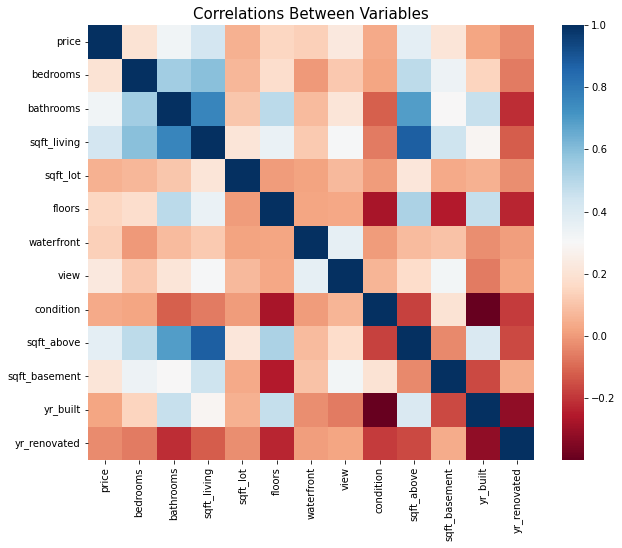

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(hpp.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

# Feature Selection

In [8]:
hpp.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
important_num_cols = list(hpp.corr()["price"][(hpp.corr()["price"]>0.50) | (hpp.corr()["price"]<-0.50)].index)
cat_cols = ["bedrooms", "view","sqft_living","yr_built","floors","condition","city"]
important_cols = important_num_cols + cat_cols

hpp = hpp[important_cols]

In [10]:
hpp

,price,bedrooms,view,sqft_living,yr_built,floors,condition,city
0,3.130000e+05,3.0,0,1340,1955,1.5,3,Shoreline
1,2.384000e+06,5.0,4,3650,1921,2.0,5,Seattle
2,3.420000e+05,3.0,0,1930,1966,1.0,4,Kent
3,4.200000e+05,3.0,0,2000,1963,1.0,4,Bellevue
4,5.500000e+05,4.0,0,1940,1976,1.0,4,Redmond
...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,0,1510,1954,1.0,4,Seattle
4596,5.343333e+05,3.0,0,1460,1983,2.0,3,Bellevue
4597,4.169042e+05,3.0,0,3010,2009,2.0,3,Renton
4598,2.034000e+05,4.0,0,2090,1974,1.0,3,Seattle


In [11]:
#Checking for the missing values
print("Missing Values by Column")
print("-"*30)
print(hpp.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",hpp.isna().sum().sum())

Missing Values by Column
------------------------------
price          0
bedrooms       0
view           0
sqft_living    0
yr_built       0
floors         0
condition      0
city           0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


# Data Visualization

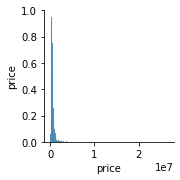

In [12]:
#Visualizing the Correlation between the numerical variables using pairplot visualization
sns.pairplot(hpp[important_num_cols])

In [13]:
hpp.columns

Index(['price', 'bedrooms', 'view', 'sqft_living', 'yr_built', 'floors',
       'condition', 'city'],
      dtype='object')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 504x576 with 0 Axes>

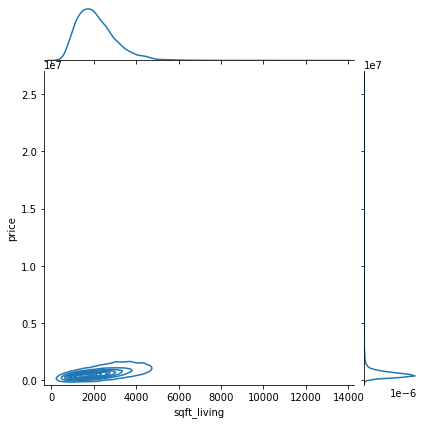

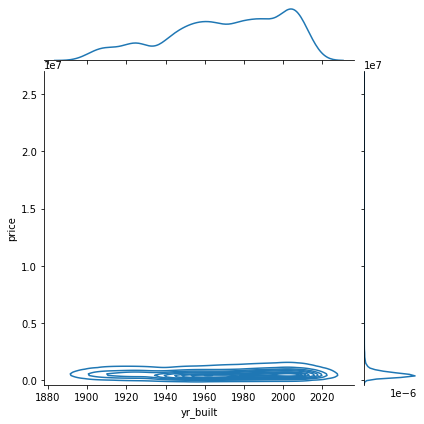

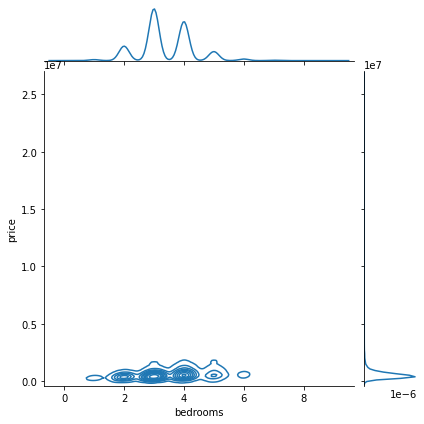

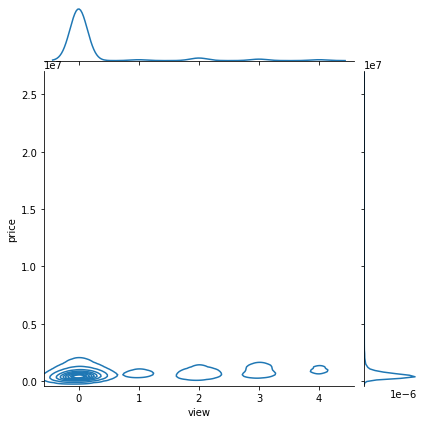

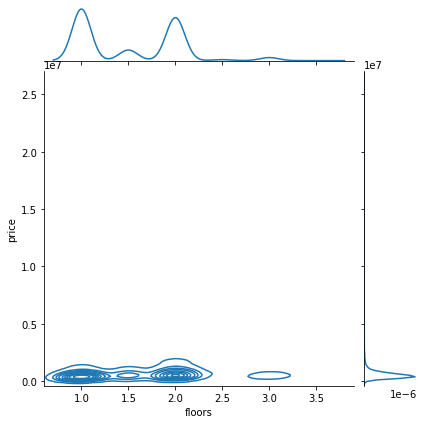

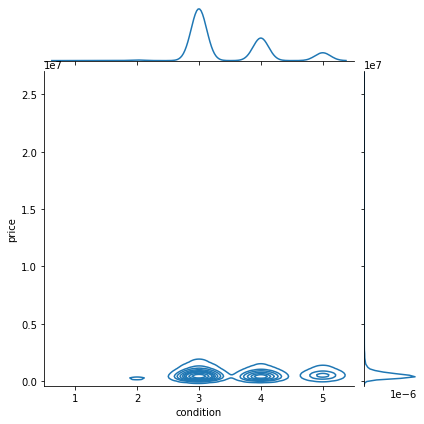

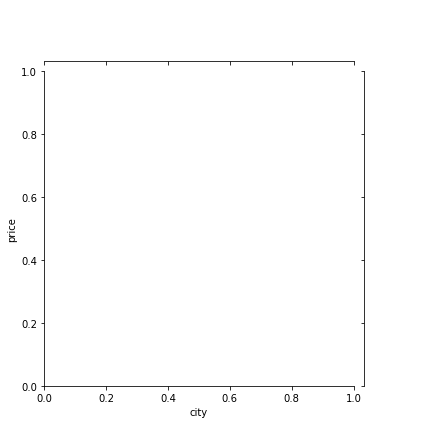

In [15]:
#Visualizing the Correlation between each column and the target variable using jointplot visualization
plt.figure(figsize=(7,8))
sns.jointplot(x=hpp["sqft_living"], y=hpp["price"], kind="kde")
sns.jointplot(x=hpp["yr_built"], y=hpp["price"], kind="kde")
sns.jointplot(x=hpp["bedrooms"], y=hpp["price"], kind="kde")
sns.jointplot(x=hpp["view"], y=hpp["price"], kind="kde")
sns.jointplot(x=hpp["floors"], y=hpp["price"], kind="kde")
sns.jointplot(x=hpp["condition"], y=hpp["price"], kind="kde")
sns.jointplot(x=hpp["city"], y=hpp["price"], kind="kde")

plt.show()

In [16]:
#Splitting the data into X and y chunks
X = hpp.drop("price", axis=1)
y = hpp["price"]

In [17]:
#One-Hot Encoding
#Encoding the categorical features in X dataset by using One-Hot Encoding method
X = pd.get_dummies(X, columns=cat_cols)

In [18]:
'''Standardizing the Data
Standardizing the numerical columns in X dataset. 
StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1'''

'Standardizing the Data\nStandardizing the numerical columns in X dataset. \nStandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1'

In [19]:
important_num_cols.remove("price")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

ValueError: at least one array or dtype is required

In [20]:
X.head()

,bedrooms_0.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_4.0,bedrooms_5.0,bedrooms_6.0,bedrooms_7.0,bedrooms_8.0,bedrooms_9.0,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Train-Test Split
#Splitting the data into Train and Test chunks for better evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Defining several evaluation functions for convenience
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

# Machine Learning Models

In [23]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [24]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, 
           "R2 Score": r_squared, 
           "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 4224925769338201.0
MSE: 2.0296477614271466e+33
RMSE: 4.505161219564897e+16
R2 Score: -1.9901505566555193e+21
------------------------------
RMSE Cross-Validation: 2.505860466359291e+17


# Ridge Regression

In [25]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, 
           "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 193644.32309340837
MSE: 991286837875.079
RMSE: 995633.8874682194
R2 Score: 0.0280037306496983
------------------------------
RMSE Cross-Validation: 445429.9198419746


# Lasso Regression

In [26]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, 
           "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 190895.9359962353
MSE: 998307911161.981
RMSE: 999153.5973822948
R2 Score: 0.021119288346063247
------------------------------
RMSE Cross-Validation: 471326.97168203245


# Elastic Net

In [27]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, 
           "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 255469.58631919938
MSE: 1011462655849.5574
RMSE: 1005714.9973275517
R2 Score: 0.008220536670928702
------------------------------
RMSE Cross-Validation: 473272.6467961439


# Support Vector Machines

In [28]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, 
           "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 193446.43358392373
MSE: 996144387277.4375
RMSE: 998070.3318290939
R2 Score: 0.023240709779373425
------------------------------
RMSE Cross-Validation: 426291.78752206656


# Random Forest Regressor

In [29]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, 
           "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 199145.8821636601
MSE: 997151323366.1372
RMSE: 998574.6458658647
R2 Score: 0.02225336879561912
------------------------------
RMSE Cross-Validation: 425832.68668896303


# XGBoost Regressor

In [30]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, 
           "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 207167.3851056761
MSE: 995559658314.5034
RMSE: 997777.3590909464
R2 Score: 0.023814059841976265
------------------------------
RMSE Cross-Validation: 423126.5748358814


# Polynomial Regression (Degree=2)

In [31]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, 
           "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MemoryError: Unable to allocate 7.76 GiB for an array with shape (3680, 283128) and data type float64

# Model Comparison(The less the Root Mean Squared Error (RMSE), The better the model is)


In [32]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,207167.385106,995559658314.503418,997777.359091,0.023814,423126.574836
5,RandomForestRegressor,199145.882164,997151323366.137207,998574.645866,0.022253,425832.686689
4,SVR,193446.433584,996144387277.4375,998070.331829,0.023241,426291.787522
1,Ridge,193644.323093,991286837875.078979,995633.887468,0.028004,445429.919842
2,Lasso,190895.935996,998307911161.980957,999153.597382,0.021119,471326.971682
3,ElasticNet,255469.586319,1011462655849.557373,1005714.997328,0.008221,473272.646796
0,LinearRegression,4224925769338201.0,2029647761427146575900624195420160.0,45051612195648968.0,-1990150556655519268864.0,250586046635929088.0


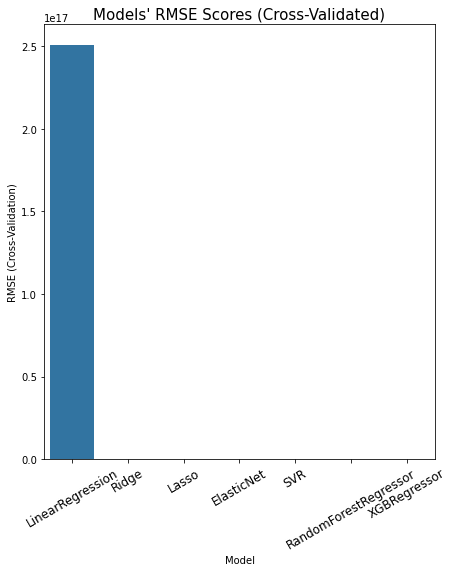

In [33]:
plt.figure(figsize=(7,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()